In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/home/ignis/Downloads/iris.csv')

In [ ]:
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [ ]:
fea=df.iloc[:,:4].values
tar=df.iloc[:,4].values


In [ ]:
from sklearn.preprocessing import StandardScaler

fea_sca=StandardScaler().fit_transform(fea)
fea_sca[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [ ]:
features=fea_sca.T
cov_mat=np.cov(features)
cov_mat[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
val,vec=np.linalg.eig(cov_mat)


In [ ]:
exp_var=[]
for i in range(len(val)):
    exp_var.append((val[i]/np.sum(val))*100)

In [ ]:
print("Variance of features :",exp_var)

Variance of features : [72.96244541329987, 22.850761786701764, 3.668921889282881, 0.5178709107154817]


Text(0.5, 0, 'feaures')

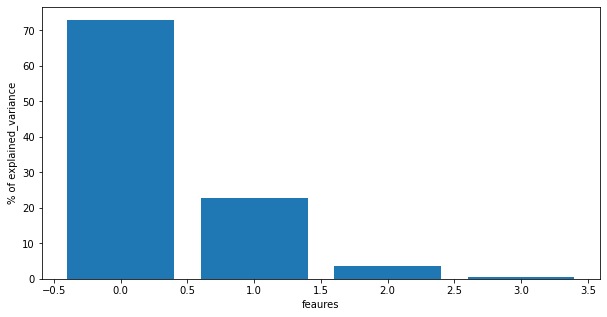

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(4),exp_var)
plt.ylabel('% of explained_variance')
plt.xlabel('feaures')


In [ ]:
pr1=fea_sca.dot(vec.T[0])
pr2=fea_sca.dot(vec.T[1])
res=pd.DataFrame(pr1,columns=['PC1'])
res['PC2']=pr2
res['Y']=tar
res

,PC1,PC2,Y
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1
...,...,...,...
145,1.870503,-0.386966,3
146,1.564580,0.896687,3
147,1.521170,-0.269069,3
148,1.372788,-1.011254,3


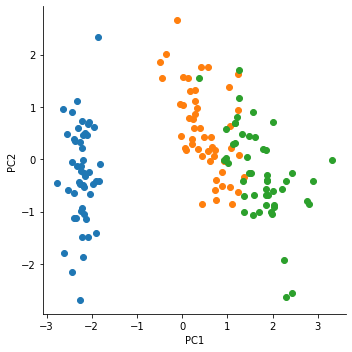

In [ ]:
import seaborn as sns
sns.FacetGrid(res,hue='Y',height=5).map(plt.scatter,'PC1','PC2')
plt.show()